In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Cyclists

In [185]:
df_cyclists = pd.read_csv('dataset/outliers/df_cyclists_FE_no_outliers.csv')
df_cyclists_outliers = pd.read_csv('dataset/outliers/df_cyclists_FE_only_outliers.csv')

In [186]:
df_cyclists.head()

,_url,birth_year,weight,height,nationality,BMI
0,bruno-surra,1964.0,68.805369,183.902338,Italy,20.344538
1,gerard-rue,1965.0,74.000000,182.000000,France,22.340297
2,nathan-van-hooydonck,1995.0,78.000000,192.000000,Belgium,21.158854
3,jose-felix-parra,1997.0,55.000000,171.000000,Spain,18.809206
4,manuel-penalver,1998.0,67.000000,177.000000,Spain,21.385936


In [187]:
df_cyclists_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         181 non-null    object 
 1   birth_year   181 non-null    float64
 2   weight       181 non-null    float64
 3   height       181 non-null    float64
 4   nationality  181 non-null    object 
 5   BMI          181 non-null    float64
dtypes: float64(4), object(2)
memory usage: 8.6+ KB


In [188]:
df_cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         5913 non-null   object 
 1   birth_year   5913 non-null   float64
 2   weight       5913 non-null   float64
 3   height       5913 non-null   float64
 4   nationality  5913 non-null   object 
 5   BMI          5913 non-null   float64
dtypes: float64(4), object(2)
memory usage: 277.3+ KB


### Basic descriptive statistic

In [189]:
df_cyclists.describe()

,birth_year,weight,height,BMI
count,5913.000000,5913.000000,5913.000000,5913.000000
mean,1974.096805,68.683833,179.865676,21.207899
std,15.477900,6.455928,6.465031,1.375900
min,1933.000000,46.199695,154.000000,16.365852
25%,1962.000000,64.000000,175.521285,20.284863
50%,1974.034035,68.665088,180.000000,21.174621
75%,1987.000000,73.000000,184.000000,22.081749
max,2004.000000,94.000000,204.000000,27.770313


### Only a new variable - BMI

In [190]:
df_cyclists['BMI'].value_counts()

BMI
21.604938    46
21.461937    27
20.452885    27
20.675803    27
20.061728    26
             ..
21.354868     1
17.755682     1
21.561027     1
19.660974     1
20.288543     1
Name: count, Length: 3533, dtype: int64

In [191]:
df_cyclists['BMI'].describe()

count    5913.000000
mean       21.207899
std         1.375900
min        16.365852
25%        20.284863
50%        21.174621
75%        22.081749
max        27.770313
Name: BMI, dtype: float64

In [192]:
def sturges_bin_count(df):
    """Calculate optimal number of bins based on Sturges' rule"""
    return int(np.ceil(np.log2(len(df)) + 1))

In [193]:
bins = sturges_bin_count(df_cyclists["BMI"])
print(f"Recommended number of bins: {bins}")

Recommended number of bins: 14


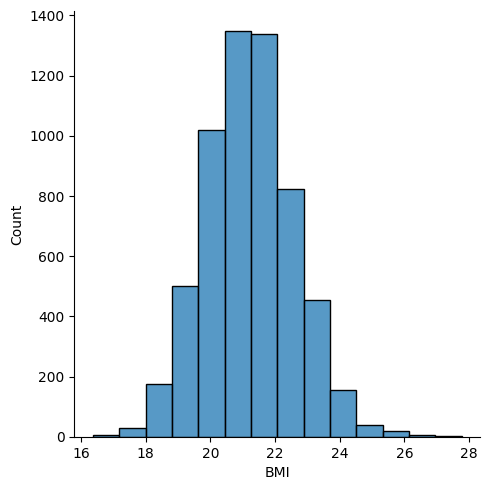

In [194]:
sns.displot(df_cyclists, x="BMI", kind="hist", row_order="desc", bins=bins)

<Axes: xlabel='BMI'>

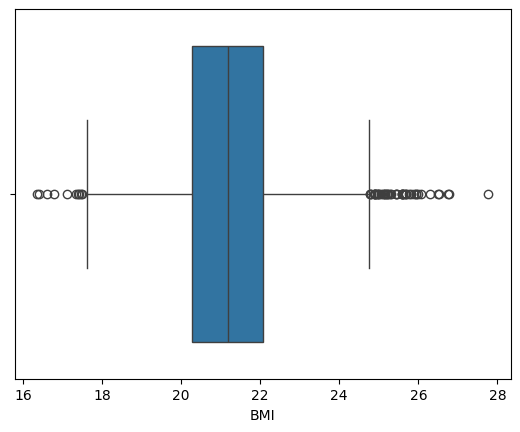

In [195]:
sns.boxplot(x='BMI', data=df_cyclists)

## Races

In [196]:
df_races = pd.read_csv('dataset/outliers/df_races_FE_no_outliers.csv')
df_races_outliers = pd.read_csv('dataset/outliers/df_races_FE_only_outliers.csv')

In [197]:
df_races_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _url                     9449 non-null   object 
 1   name                     9449 non-null   object 
 2   points                   9449 non-null   float64
 3   uci_points               9449 non-null   float64
 4   length                   9449 non-null   float64
 5   climb_total              9449 non-null   float64
 6   profile                  9449 non-null   int64  
 7   startlist_quality        9449 non-null   float64
 8   date                     9449 non-null   object 
 9   position                 9449 non-null   int64  
 10  cyclist                  9449 non-null   object 
 11  cyclist_age              9449 non-null   float64
 12  is_tarmac                9449 non-null   bool   
 13  is_cobbled               9449 non-null   bool   
 14  is_gravel               

In [198]:
df_races_no_FE = pd.read_csv('dataset/dataset_originali/races.csv')


In [199]:
columns_diff = df_races.columns.difference(df_races_no_FE.columns)

df_races_only_new = df_races[columns_diff]
df_races_only_new.head()

,avg_delta,consistency_score,delta_std,finish_position_std,period,race_difficulty,team_avg_strength,top_x_finish,top_x_finish_percentage,year
0,2.351351,0.003283,9.455205,18.685480,1970s,0.225995,1117.306216,True,0.675676,1970.0
1,0.000000,0.065637,0.000000,8.141116,1970s,0.225995,1117.306216,True,0.600000,1970.0
2,2.716418,0.001798,14.539190,18.234961,1970s,0.225995,1098.066569,True,0.537313,1970.0
3,3.736842,0.005988,13.421814,7.836705,1970s,0.225995,1098.066569,True,0.763158,1970.0
4,4.714286,0.001331,8.882835,9.860938,1970s,0.225995,1121.314981,True,0.142857,1970.0


In [200]:
df_races_only_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579661 entries, 0 to 579660
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   avg_delta                579661 non-null  float64
 1   consistency_score        579661 non-null  float64
 2   delta_std                579661 non-null  float64
 3   finish_position_std      579661 non-null  float64
 4   period                   579661 non-null  object 
 5   race_difficulty          579661 non-null  float64
 6   team_avg_strength        579661 non-null  float64
 7   top_x_finish             579661 non-null  bool   
 8   top_x_finish_percentage  579661 non-null  float64
 9   year                     579661 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 40.4+ MB


### Basic descriptive statistics

In [201]:
df_races_only_new.describe()

,avg_delta,consistency_score,delta_std,finish_position_std,race_difficulty,team_avg_strength,top_x_finish_percentage,year
count,579661.000000,579661.000000,579661.000000,579661.000000,579661.000000,579661.000000,579661.000000,579661.000000
mean,7.532378,0.000189,36.067330,42.203472,0.212248,1101.174737,0.092963,2006.271290
std,9.939462,0.005517,109.121946,8.079857,0.208865,26.611427,0.105360,11.404229
min,-20.016064,0.000000,0.000000,0.000000,0.000000,539.333333,0.000000,1970.000000
25%,4.336397,0.000016,17.238114,37.445638,0.046805,1085.969878,0.020000,1999.000000
50%,6.046070,0.000046,24.722638,41.799812,0.135626,1099.504661,0.057143,2008.000000
75%,8.467049,0.000117,36.047889,46.778879,0.325858,1117.479352,0.131579,2015.000000
max,420.000000,1.000000,4154.655828,108.187338,1.000000,1170.673568,1.000000,2023.000000


In [202]:
numeric_columns = df_races_only_new.select_dtypes(include=['int64', 'float64']).columns

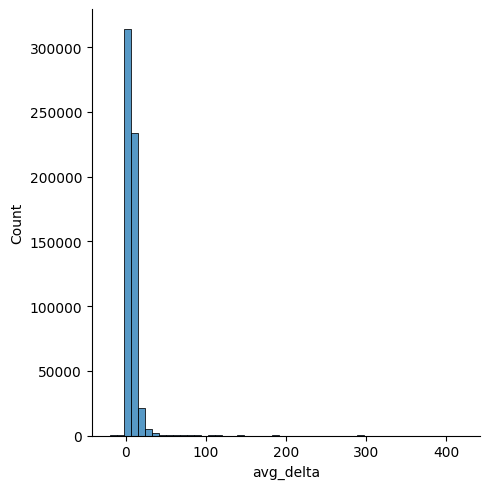

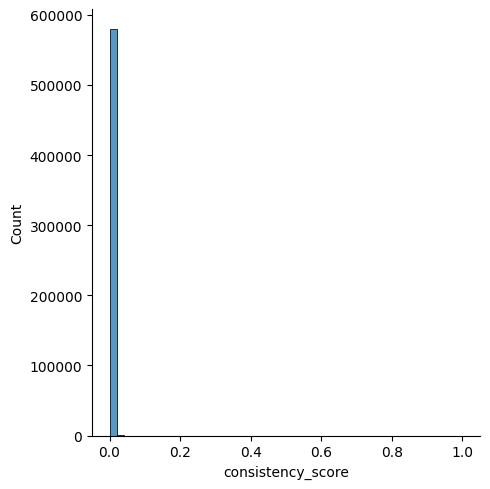

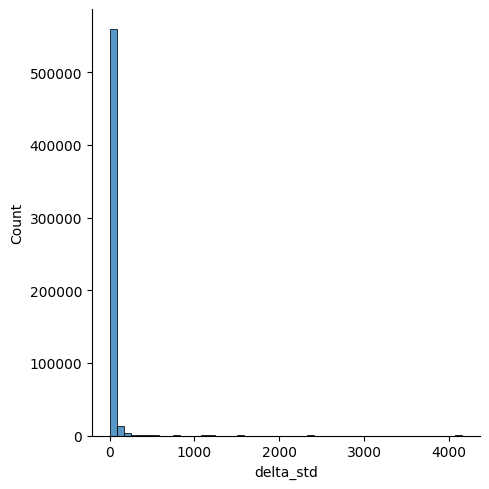

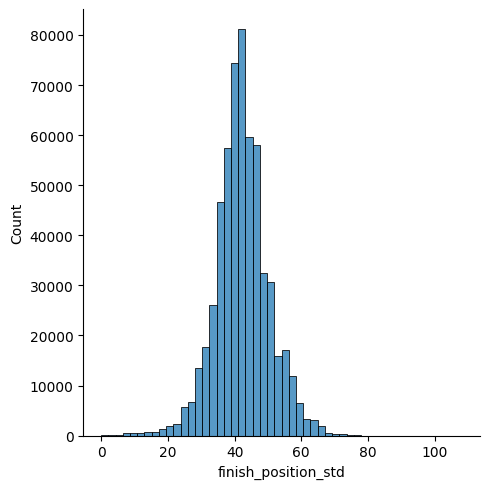

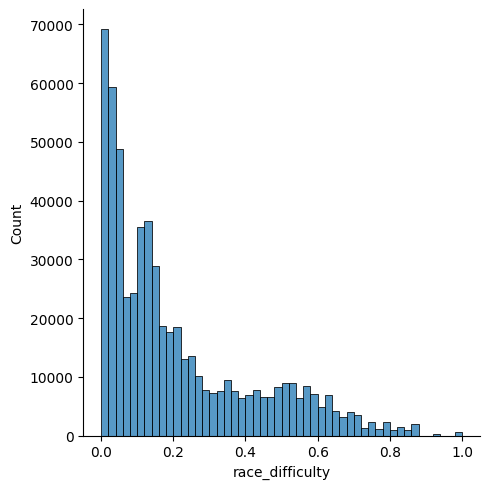

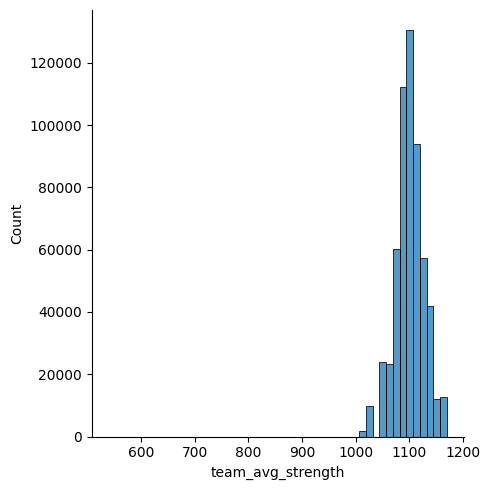

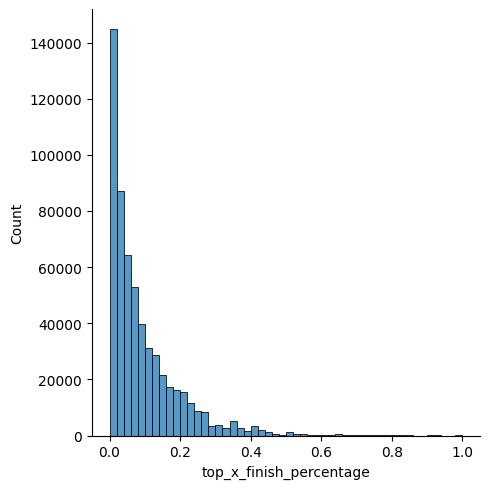

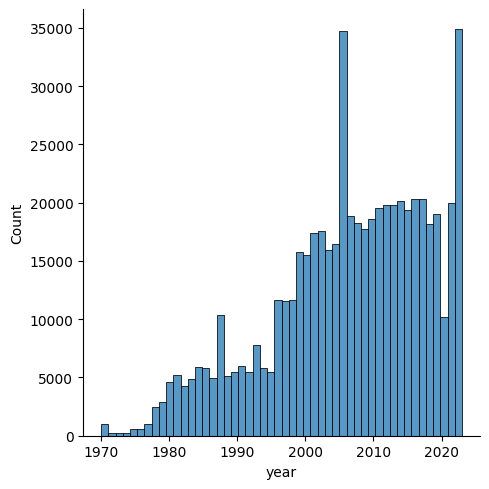

In [203]:
for col in numeric_columns:
    bins = sturges_bin_count(df_races_only_new[col])
    sns.displot(df_races_only_new, x=col, kind="hist", row_order="desc", bins=50)

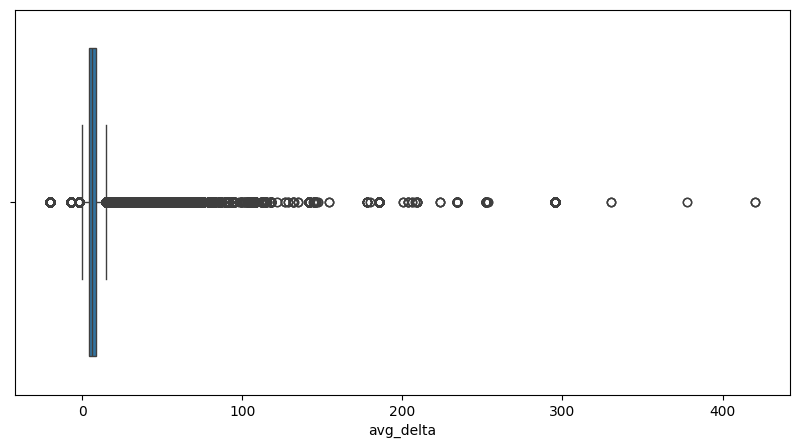

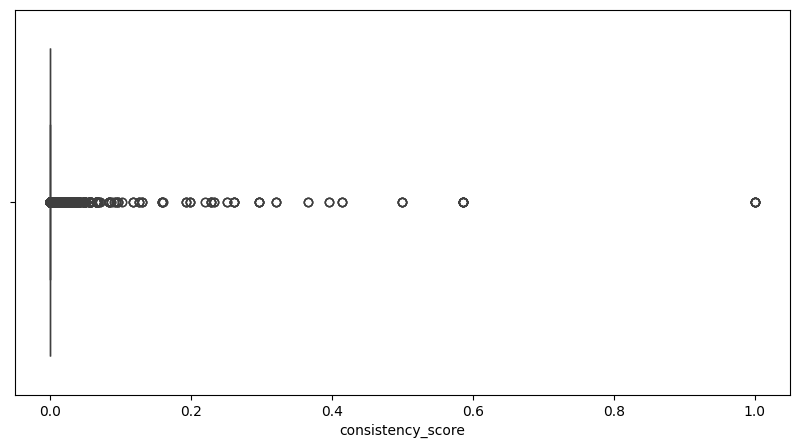

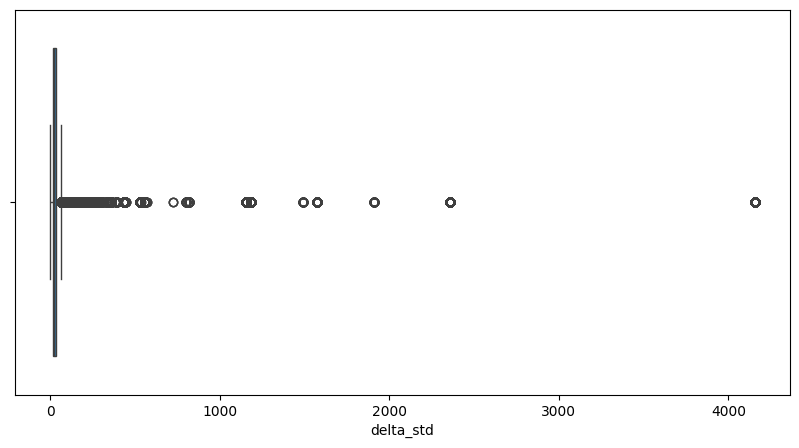

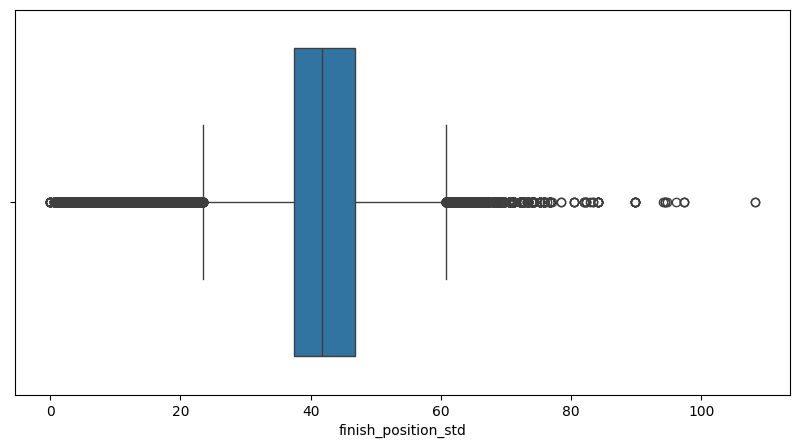

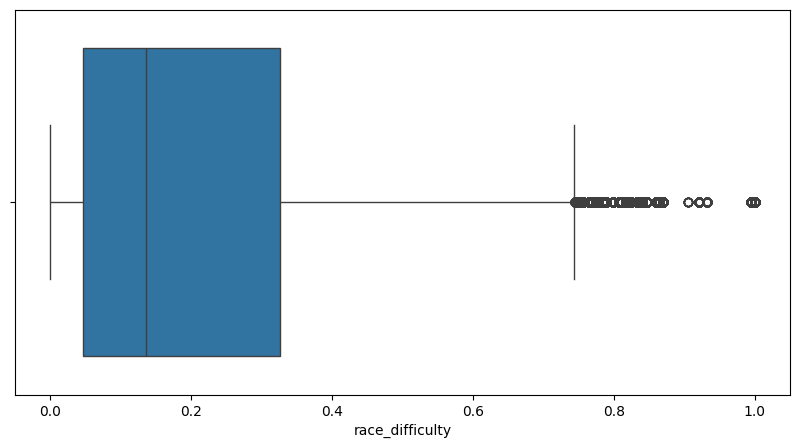

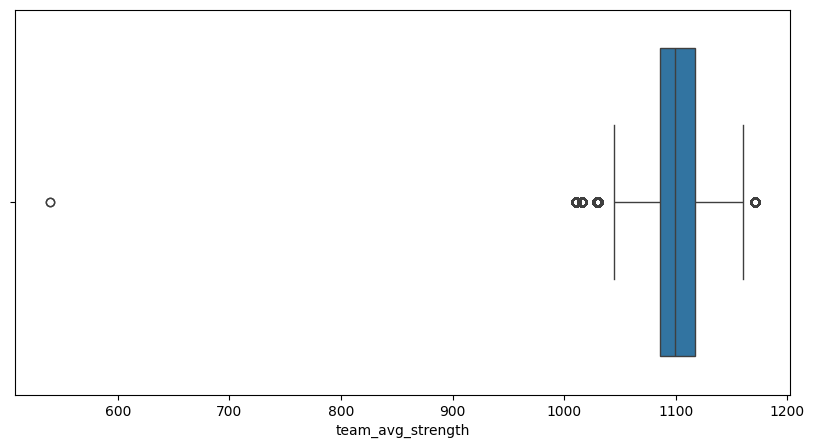

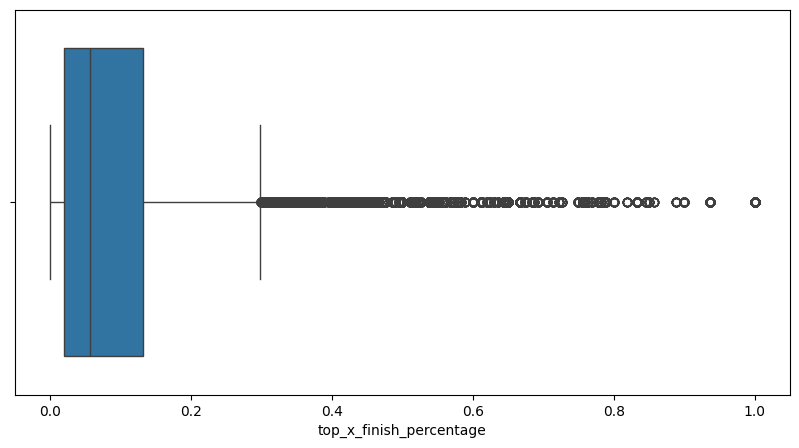

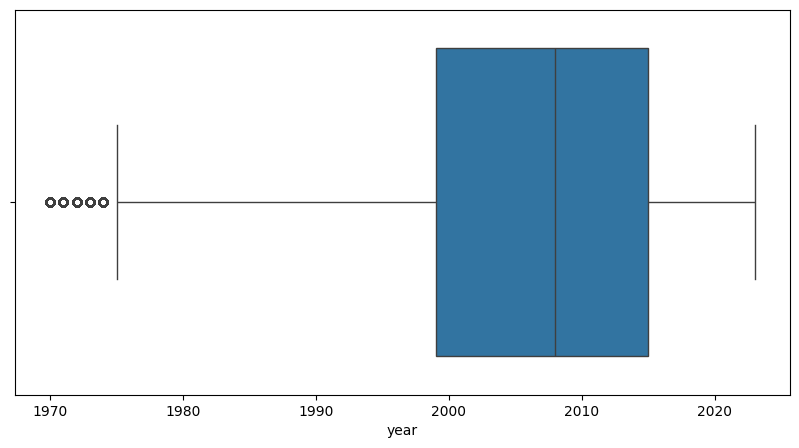

In [204]:
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_races_only_new, x=col)
    plt.xlabel(col)
    plt.show()

## Combination of the two

In [205]:
df_races_original= pd.read_csv('dataset/feature_engineering/df_races_FE.csv')
df_cyclists_original = pd.read_csv('dataset/feature_engineering/df_cyclists_FE.csv')

df_merged_original = pd.merge(df_races_original, df_cyclists_original, left_on='cyclist', right_on='_url', how='inner')

df_merged = pd.read_csv('dataset/outliers/merged_FE_no_outliers.csv')

new_features = df_merged.columns.difference(df_merged_original.columns)

df_merged[new_features].head()

,PWR,climb_efficiency,prestige_weighted_delta,time_gap
0,6.776599,0.000254,0.000000,0.000000
1,5.355048,1.000254,0.000000,0.000000
2,5.405405,2.000254,0.097778,0.000092
3,5.737784,3.000254,0.048889,0.000046
4,5.795992,4.000254,0.000000,0.000000


In [206]:
df_merged[new_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576378 entries, 0 to 576377
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PWR                      576378 non-null  float64
 1   climb_efficiency         576378 non-null  float64
 2   prestige_weighted_delta  576378 non-null  float64
 3   time_gap                 576378 non-null  float64
dtypes: float64(4)
memory usage: 17.6 MB


### Basic descriptive statistics

In [207]:
df_merged[new_features].describe()

,PWR,climb_efficiency,prestige_weighted_delta,time_gap
count,576378.000000,576378.000000,576378.000000,576378.000000
mean,1.318598,74.514212,0.098203,0.000070
std,1.834544,48.294341,1.910158,0.008096
min,0.063830,0.000144,-138.120000,-0.069604
25%,0.246154,33.000331,0.000000,0.000000
50%,0.833333,71.000294,0.000000,0.000000
75%,1.542058,112.000782,0.012500,0.000012
max,14.548967,209.001068,1226.820000,6.134100


In [208]:
df_merged = df_merged[new_features]

In [209]:
df_merged.head()

,PWR,climb_efficiency,prestige_weighted_delta,time_gap
0,6.776599,0.000254,0.000000,0.000000
1,5.355048,1.000254,0.000000,0.000000
2,5.405405,2.000254,0.097778,0.000092
3,5.737784,3.000254,0.048889,0.000046
4,5.795992,4.000254,0.000000,0.000000


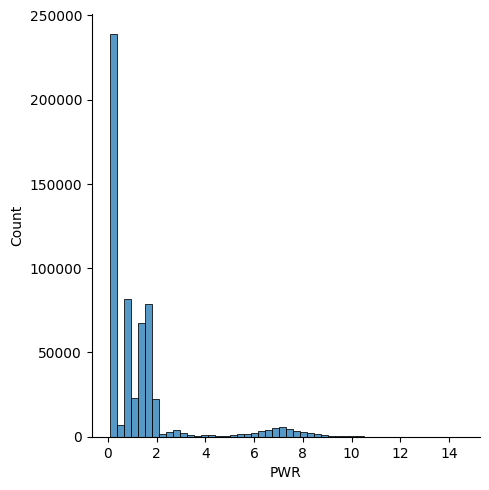

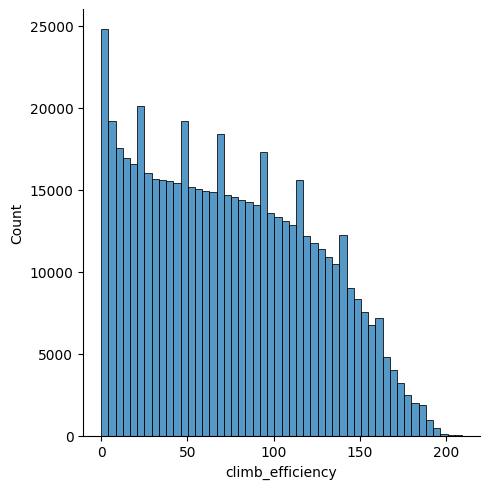

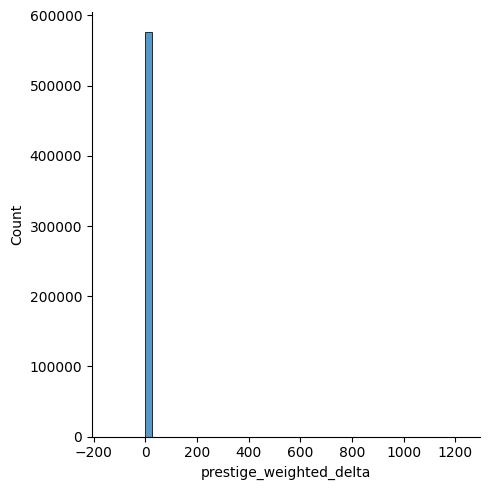

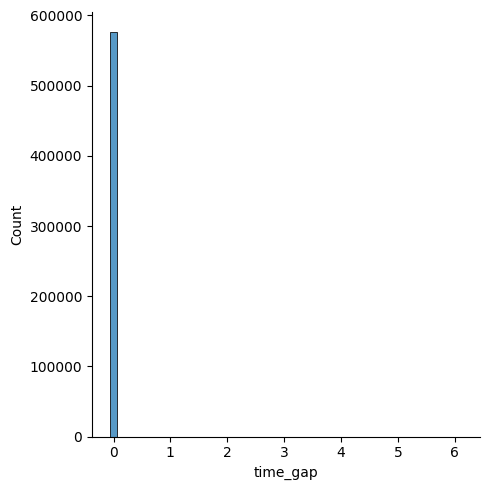

In [210]:
numeric_columns = df_merged.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    bins = sturges_bin_count(df_merged[col])
    sns.displot(df_merged, x=col, kind="hist", row_order="desc", bins=50)

## Correlation

### Utility function definition

In [211]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

### Cyclists

In [212]:
df_cyclists = pd.read_csv('dataset/outliers/df_cyclists_FE_no_outliers.csv')

In [213]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_cyclists)
correlations = correlations(normalized_dataset)
correlations

,birth_year,weight,height,BMI,correlation_type
birth_year,1.000000,-0.028976,0.034565,-0.074531,kendall
weight,-0.028976,1.000000,0.525678,0.455507,kendall
height,0.034565,0.525678,1.000000,-0.027322,kendall
BMI,-0.074531,0.455507,-0.027322,1.000000,kendall
birth_year,1.000000,-0.035170,0.048898,-0.106729,pearson
weight,-0.035170,1.000000,0.728774,0.646113,pearson
height,0.048898,0.728774,1.000000,-0.049223,pearson
BMI,-0.106729,0.646113,-0.049223,1.000000,pearson
birth_year,1.000000,-0.042219,0.050848,-0.109038,spearman
weight,-0.042219,1.000000,0.709530,0.634460,spearman


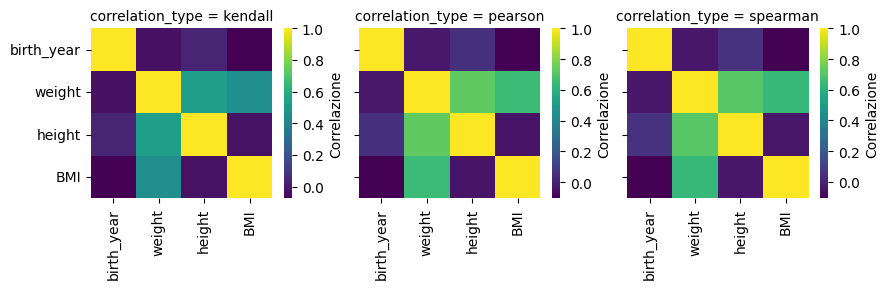

In [214]:
g = sns.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

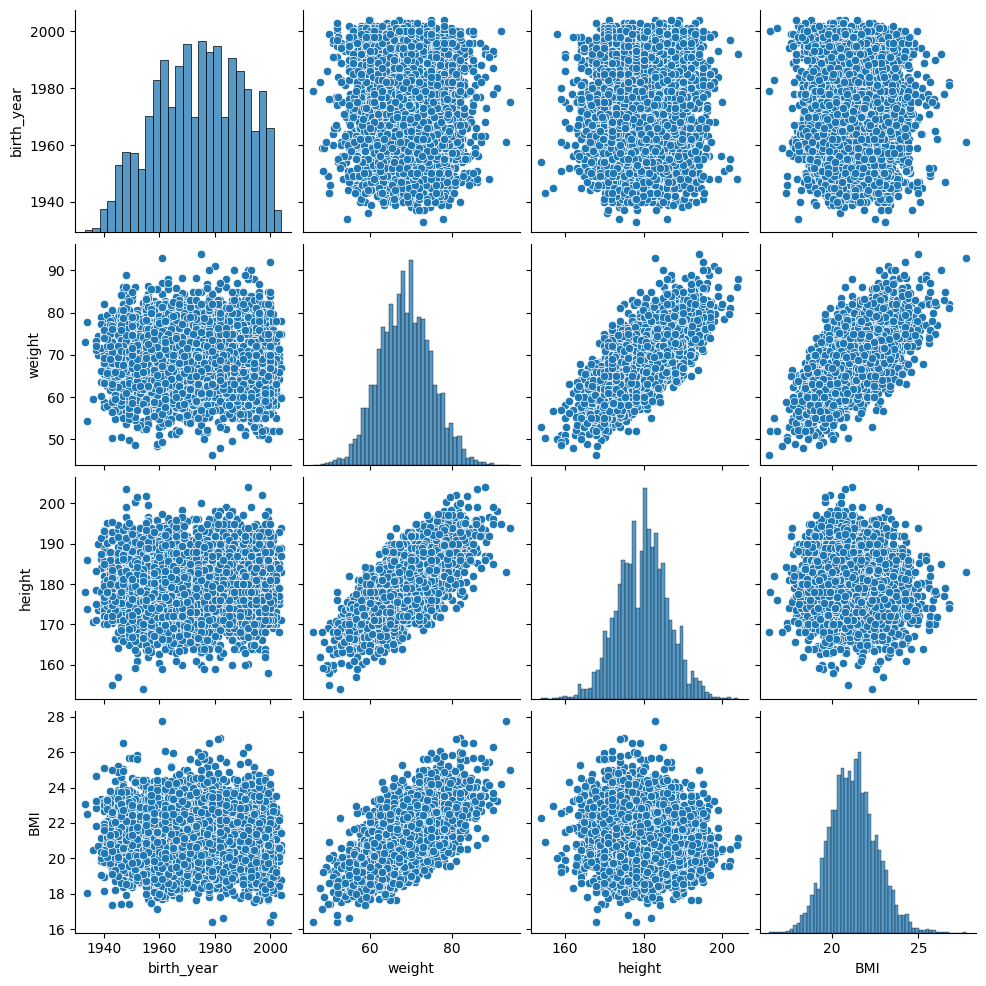

In [215]:
numerical_features = df_cyclists.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_cyclists[numerical_features])
plt.show()

### Races

In [224]:
df_races = pd.read_csv('dataset/outliers/df_races_FE_no_outliers.csv')

In [225]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [226]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_races)
correlation_results = correlations(normalized_dataset) 
correlation_results

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,race_difficulty,team_avg_strength,finish_position_std,avg_delta,delta_std,top_x_finish_percentage,consistency_score,correlation_type
points,1.000000,0.487628,0.280381,0.084276,-0.071249,0.389863,0.011325,-0.004387,-0.019534,-0.184078,0.021330,0.031922,0.020109,0.014345,0.023946,0.098293,0.079484,kendall
uci_points,0.487628,1.000000,0.174395,0.078375,0.004036,0.022594,-0.045464,-0.007086,-0.005494,0.028694,0.045216,-0.020361,-0.028244,0.028253,0.005551,0.050444,0.045900,kendall
length,0.280381,0.174395,1.000000,0.303078,0.028997,0.065249,-0.014828,-0.002135,-0.118472,-0.062414,0.196700,0.012918,0.014313,0.004903,0.011014,0.037238,0.027229,kendall
climb_total,0.084276,0.078375,0.303078,1.000000,0.562320,0.014869,-0.023555,0.003029,-0.031469,0.033086,0.815669,0.000399,-0.008808,0.005361,-0.002688,0.006721,0.008266,kendall
profile,-0.071249,0.004036,0.028997,0.562320,1.000000,-0.064268,-0.013495,0.007495,0.074709,0.110699,0.774020,-0.009246,-0.015341,0.004617,-0.011292,-0.025673,-0.017573,kendall
startlist_quality,0.389863,0.022594,0.065249,0.014869,-0.064268,1.000000,0.096049,0.033836,-0.012083,-0.139691,-0.014533,0.040859,0.058826,-0.002884,0.022579,0.076714,0.058781,kendall
position,0.011325,-0.045464,-0.014828,-0.023555,-0.013495,0.096049,1.000000,0.006461,-0.080672,0.084140,-0.017307,-0.010110,0.096412,0.028794,0.036131,-0.227564,-0.233305,kendall
cyclist_age,-0.004387,-0.007086,-0.002135,0.003029,0.007495,0.033836,0.006461,1.000000,-0.006180,0.087183,0.005749,-0.003747,0.014780,-0.013250,0.035233,0.045150,0.036323,kendall
delta,-0.019534,-0.005494,-0.118472,-0.031469,0.074709,-0.012083,-0.080672,-0.006180,1.000000,0.012057,0.004060,0.000323,-0.008283,0.054992,0.025178,0.025432,0.017949,kendall
year,-0.184078,0.028694,-0.062414,0.033086,0.110699,-0.139691,0.084140,0.087183,0.012057,1.000000,0.067401,-0.049235,0.008284,0.049124,-0.027341,-0.149014,-0.126329,kendall


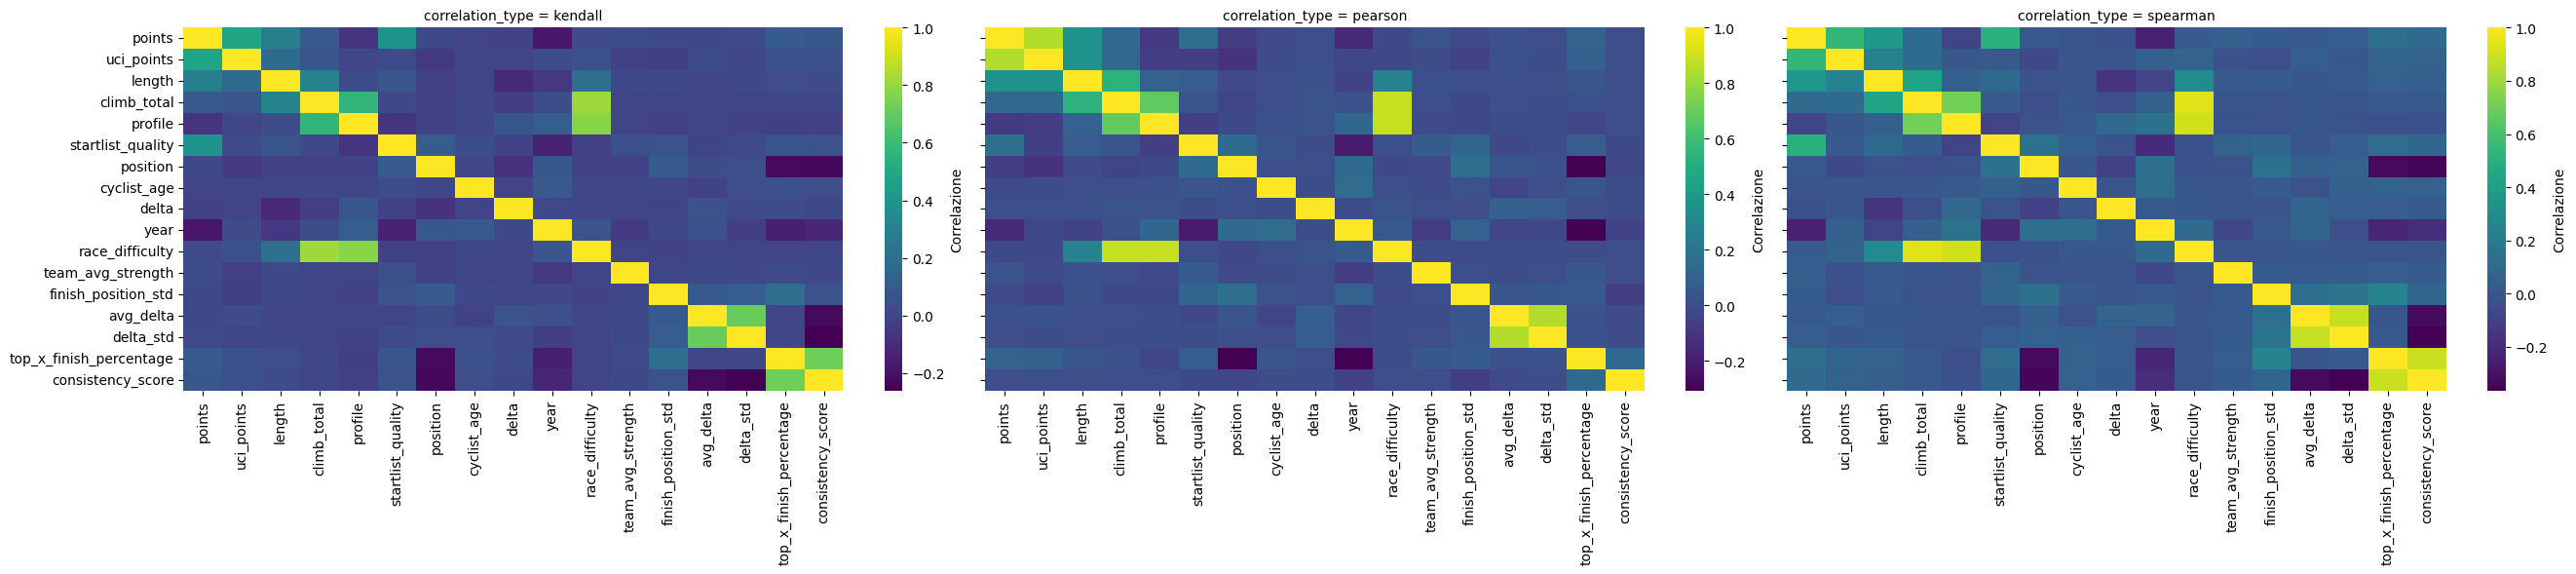

In [227]:
g = sns.FacetGrid(correlation_results, col="correlation_type", height=6, aspect=1.5)
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

### Combination of the two

In [228]:
df_merged = pd.read_csv('dataset/outliers/merged_FE_no_outliers.csv')

In [229]:
from typing import Tuple, Dict, Any

def __transform_single_features(dataset: pd.DataFrame, transformation: str) -> Tuple[
    pd.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations


def center_and_scale(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")

def correlations(dataset: pd.DataFrame) -> pd.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pd.concat(correlations_dictionary.values())

    return correlations_matrix

In [230]:
normalized_dataset, normalization_scalers_dataset = center_and_scale(df_merged)
correlations = correlations(normalized_dataset)
correlations

,points,uci_points,length,climb_total,profile,startlist_quality,position,cyclist_age,delta,year,...,consistency_score,birth_year,weight,height,BMI,PWR,climb_efficiency,time_gap,prestige_weighted_delta,correlation_type
points,1.000000,0.487506,0.281327,0.083750,-0.071735,0.388184,0.011920,-0.005154,-0.021712,-0.184399,...,0.078342,-0.188229,0.050921,0.014667,0.057912,0.443357,0.011328,-0.037879,-0.042861,kendall
uci_points,0.487506,1.000000,0.175315,0.078732,0.004260,0.021777,-0.045755,-0.006931,-0.005831,0.027433,...,0.044807,0.011043,0.027386,0.022269,0.016127,0.915651,-0.046114,-0.014410,-0.017921,kendall
length,0.281327,0.175315,1.000000,0.303934,0.033899,0.065342,-0.015542,-0.002036,-0.116843,-0.061864,...,0.026040,-0.062164,0.027005,0.008436,0.029665,0.160947,-0.017357,-0.167160,-0.125128,kendall
climb_total,0.083750,0.078732,0.303934,1.000000,0.565693,0.012700,-0.023440,0.002074,-0.030713,0.034245,...,0.004956,0.031184,-0.011948,-0.000978,-0.016264,0.075299,-0.029412,-0.073447,-0.035683,kendall
profile,-0.071735,0.004260,0.033899,0.565693,1.000000,-0.066604,-0.012697,0.006633,0.074893,0.112698,...,-0.020950,0.107384,-0.025607,-0.000488,-0.036318,0.009052,-0.016055,0.053995,0.074888,kendall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMI,0.077198,0.022799,0.044390,-0.024381,-0.049010,0.061609,0.052739,0.064994,-0.028051,-0.171817,...,0.030940,-0.192173,0.633943,-0.021832,1.000000,-0.082112,0.052979,-0.025199,-0.029612,spearman
PWR,0.524198,0.983835,0.235872,0.112050,0.014288,-0.009850,-0.081440,-0.014915,-0.003073,0.061464,...,0.075409,0.040983,-0.124178,-0.087495,-0.082112,1.000000,-0.082164,-0.014047,-0.017479,spearman
climb_efficiency,0.015105,-0.065445,-0.026176,-0.041069,-0.021475,0.142095,0.999981,0.008570,-0.103300,0.118873,...,-0.340312,0.119868,0.093196,0.074813,0.052979,-0.082164,1.000000,-0.096018,-0.102873,spearman
time_gap,-0.043890,-0.017758,-0.215771,-0.093899,0.063625,-0.025407,-0.096518,-0.009115,0.988986,0.016056,...,0.016777,0.015847,-0.024336,-0.008582,-0.025199,-0.014047,-0.096018,1.000000,0.989811,spearman


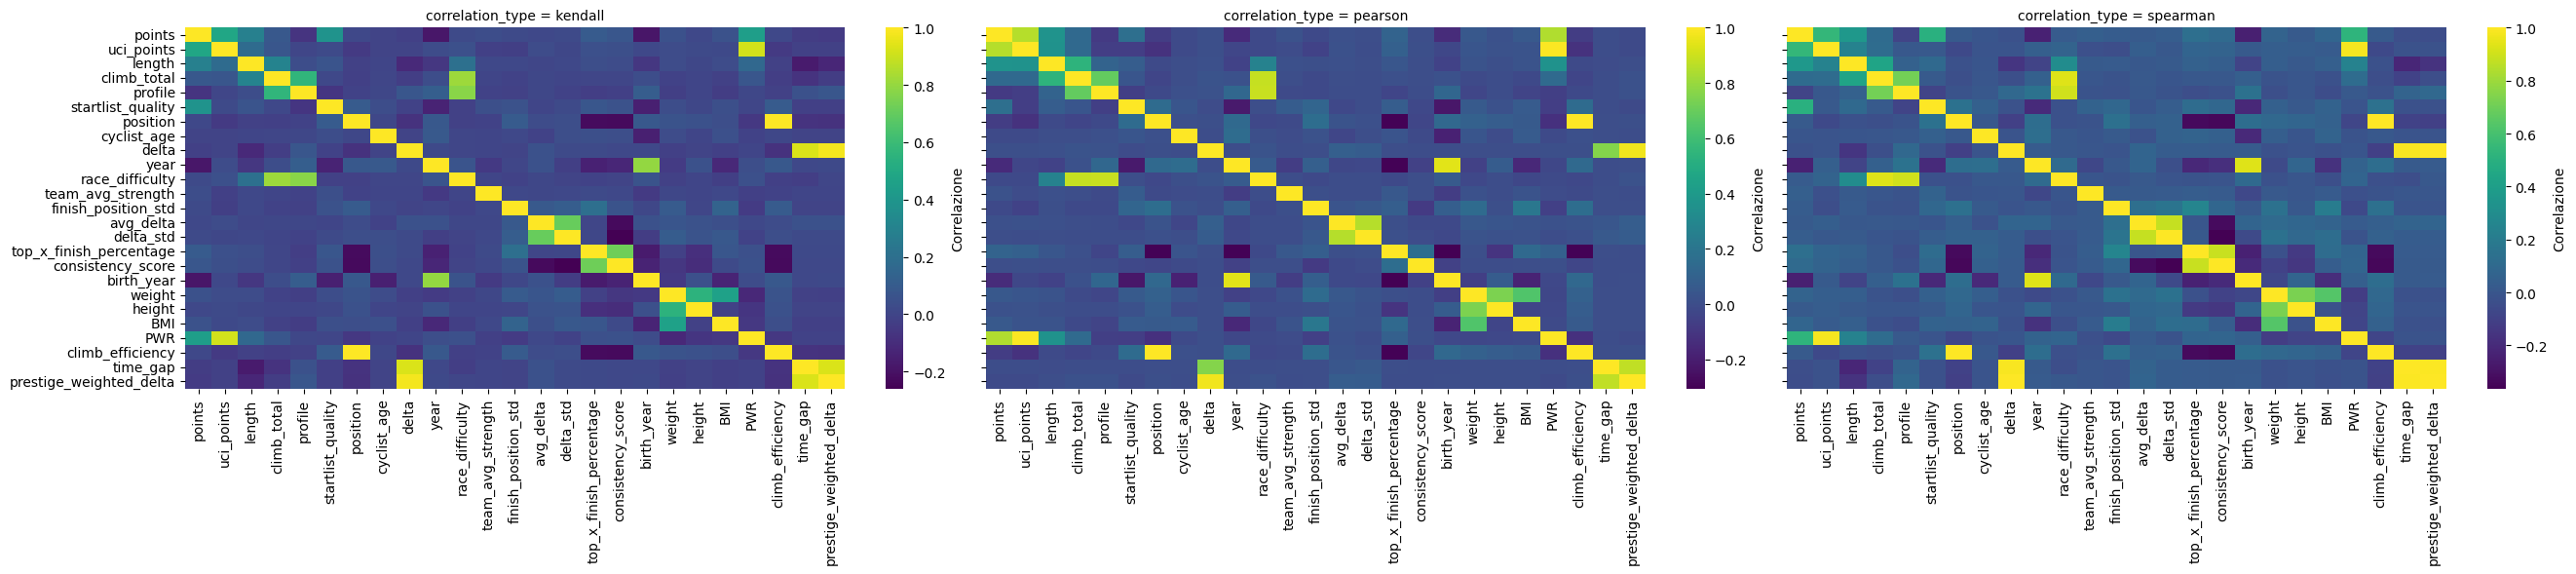

In [231]:
g = sns.FacetGrid(correlations, col="correlation_type", height=6, aspect=1.5)
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:-1]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()